In [1]:
%config IPCompleter.greedy=True
!python --version

Python 3.7.4


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

!pwd

/Users/danielchan/Dropbox/Mobile_Upload


In [3]:
df = pd.read_csv('./Validation and Submission as of 10302019_5_48PM.csv', index_col=None)

In [4]:
df.head()

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
0,4403,2019-10-30 00:10:13,300100,iPhone XR,12.3.1,Successful validation.,NaN,NaN,NaN,2019-10-30 00:10:13,2019-10-30 00:10:13,1.0.201910230000.2
1,4407,2019-10-30 00:14:26,300100,SM-G965U,28,Successful validation.,NaN,NaN,NaN,2019-10-30 00:14:26,2019-10-30 00:14:32,1.0
2,4414,2019-10-30 00:42:37,300200,iPhone XS Max,13.1.3,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,NaN,2019-10-30 00:42:37,2019-10-30 00:42:51,1.0.201910230000.2
3,4419,2019-10-30 00:51:40,300100,iPhone 7,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-30 00:51:40,2019-10-30 00:51:44,1.0.201910230000.2
4,4422,2019-10-30 01:05:18,300100,iPhone XR,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-30 01:05:18,2019-10-30 01:05:22,1.0.201910230000.2


In [5]:
df.shape

(873, 12)

In [6]:
df.dtypes

MOBILE_APP_REQUEST_ID     int64
INSERT_TS                object
RESPONSE_STATUS_ID        int64
DEVICE                   object
DEVICE_OS                object
RESPONSE_STATUS_NAME     object
MOBILE_SUBMISSION_ID     object
Size                     object
Page Count               object
INSERT_TS.1              object
LAST_UPDATE_TS           object
CLIENT_VERSION           object
dtype: object

In [7]:
# convert INSERT_TS, INSERT_TS.1 and LAST_UPDATE_TS to datetime
df['INSERT_TS'] = pd.to_datetime(df['INSERT_TS'])
df['INSERT_TS.1'] = pd.to_datetime(df['INSERT_TS.1'])
df['LAST_UPDATE_TS'] = pd.to_datetime(df['LAST_UPDATE_TS'])

In [8]:
df.dtypes

MOBILE_APP_REQUEST_ID             int64
INSERT_TS                datetime64[ns]
RESPONSE_STATUS_ID                int64
DEVICE                           object
DEVICE_OS                        object
RESPONSE_STATUS_NAME             object
MOBILE_SUBMISSION_ID             object
Size                             object
Page Count                       object
INSERT_TS.1              datetime64[ns]
LAST_UPDATE_TS           datetime64[ns]
CLIENT_VERSION                   object
dtype: object

In [9]:
df['INSERT_TS'].dt.time

0      00:10:13
1      00:14:26
2      00:42:37
3      00:51:40
4      01:05:18
         ...   
868    17:43:02
869    17:43:25
870    17:44:06
871    17:44:08
872    17:45:30
Name: INSERT_TS, Length: 873, dtype: object

In [10]:
df.head()

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
0,4403,2019-10-30 00:10:13,300100,iPhone XR,12.3.1,Successful validation.,NaN,NaN,NaN,2019-10-30 00:10:13,2019-10-30 00:10:13,1.0.201910230000.2
1,4407,2019-10-30 00:14:26,300100,SM-G965U,28,Successful validation.,NaN,NaN,NaN,2019-10-30 00:14:26,2019-10-30 00:14:32,1.0
2,4414,2019-10-30 00:42:37,300200,iPhone XS Max,13.1.3,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,NaN,2019-10-30 00:42:37,2019-10-30 00:42:51,1.0.201910230000.2
3,4419,2019-10-30 00:51:40,300100,iPhone 7,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-30 00:51:40,2019-10-30 00:51:44,1.0.201910230000.2
4,4422,2019-10-30 01:05:18,300100,iPhone XR,13.1.3,Successful validation.,NaN,NaN,NaN,2019-10-30 01:05:18,2019-10-30 01:05:22,1.0.201910230000.2


In [11]:
df.tail(10)

,MOBILE_APP_REQUEST_ID,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,RESPONSE_STATUS_NAME,MOBILE_SUBMISSION_ID,Size,Page Count,INSERT_TS.1,LAST_UPDATE_TS,CLIENT_VERSION
863,6476,2019-10-30 17:41:51,400100,iPhone 6 Plus,12.4.2,Documents successfully submitted.,f3227c54-5622-4367-b3a4-572f0af91937,submission - images size 1631376,submission - images received 1,2019-10-30 17:41:51,2019-10-30 17:41:52,1.0.201910230000.2
864,6477,2019-10-30 17:41:52,300200,SM-G950U1,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,NaN,2019-10-30 17:41:52,2019-10-30 17:41:52,1.0
865,6478,2019-10-30 17:42:14,300100,SM-A205U,28,Successful validation.,NaN,NaN,NaN,2019-10-30 17:42:14,2019-10-30 17:42:15,1.0
866,6479,2019-10-30 17:42:45,400100,SM-G975U1,28,Documents successfully submitted.,18ef0119-8e00-4c93-b3d6-7046841ea3c4,submission - images size 2138336,submission - images received 1,2019-10-30 17:42:45,2019-10-30 17:42:46,1.0
867,6480,2019-10-30 17:42:46,300100,iPhone X,12.4.1,Successful validation.,NaN,NaN,NaN,2019-10-30 17:42:46,2019-10-30 17:42:47,1.0.201910230000.2
868,6483,2019-10-30 17:43:02,300200,SM-G950U1,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,NaN,2019-10-30 17:43:02,2019-10-30 17:43:02,1.0
869,6484,2019-10-30 17:43:25,400100,SM-G975U1,28,Documents successfully submitted.,7d91f05a-b1d4-4b25-83f2-4f75c1853feb,submission - images size 2197840,submission - images received 1,2019-10-30 17:43:25,2019-10-30 17:43:26,1.0
870,6485,2019-10-30 17:44:06,300200,SM-G950U1,28,INFORMATION_NOT_VERIFIED_TITLE,NaN,NaN,NaN,2019-10-30 17:44:06,2019-10-30 17:44:07,1.0
871,6486,2019-10-30 17:44:08,400100,SM-G975U1,28,Documents successfully submitted.,60947910-adf0-4413-a7b4-34f66ac0554d,submission - images size 2294368,submission - images received 1,2019-10-30 17:44:08,2019-10-30 17:44:09,1.0
872,6489,2019-10-30 17:45:30,300100,iPhone 6 Plus,12.4.2,Successful validation.,NaN,NaN,NaN,2019-10-30 17:45:30,2019-10-30 17:45:30,1.0.201910230000.2


In [12]:
df = df.drop(columns=["RESPONSE_STATUS_NAME", "MOBILE_APP_REQUEST_ID", "INSERT_TS.1"])
df.head()

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-30 00:10:13,300100,iPhone XR,12.3.1,NaN,NaN,NaN,2019-10-30 00:10:13,1.0.201910230000.2
1,2019-10-30 00:14:26,300100,SM-G965U,28,NaN,NaN,NaN,2019-10-30 00:14:32,1.0
2,2019-10-30 00:42:37,300200,iPhone XS Max,13.1.3,NaN,NaN,NaN,2019-10-30 00:42:51,1.0.201910230000.2
3,2019-10-30 00:51:40,300100,iPhone 7,13.1.3,NaN,NaN,NaN,2019-10-30 00:51:44,1.0.201910230000.2
4,2019-10-30 01:05:18,300100,iPhone XR,13.1.3,NaN,NaN,NaN,2019-10-30 01:05:22,1.0.201910230000.2


In [13]:
df.dtypes

INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
MOBILE_SUBMISSION_ID            object
Size                            object
Page Count                      object
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
dtype: object

In [14]:
df['LAST_UPDATE_TS'].sub(df['INSERT_TS'], axis=0)

0     00:00:00
1     00:00:06
2     00:00:14
3     00:00:04
4     00:00:04
        ...   
868   00:00:00
869   00:00:01
870   00:00:01
871   00:00:01
872   00:00:00
Length: 873, dtype: timedelta64[ns]

In [15]:
df["Page Count"] = df["Page Count"].str.extract(r'\b(\w+)$', expand=True)

In [16]:
df["Size"] = df["Size"].str.extract(r'\b(\w+)$', expand=True)
df.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-30 00:10:13,300100,iPhone XR,12.3.1,NaN,NaN,NaN,2019-10-30 00:10:13,1.0.201910230000.2
1,2019-10-30 00:14:26,300100,SM-G965U,28,NaN,NaN,NaN,2019-10-30 00:14:32,1.0
2,2019-10-30 00:42:37,300200,iPhone XS Max,13.1.3,NaN,NaN,NaN,2019-10-30 00:42:51,1.0.201910230000.2
3,2019-10-30 00:51:40,300100,iPhone 7,13.1.3,NaN,NaN,NaN,2019-10-30 00:51:44,1.0.201910230000.2
4,2019-10-30 01:05:18,300100,iPhone XR,13.1.3,NaN,NaN,NaN,2019-10-30 01:05:22,1.0.201910230000.2
5,2019-10-30 01:10:44,400100,iPhone XR,13.1.3,686dacaa-dbf8-4576-9d0e-b7e513b838ee,5994640,8,2019-10-30 01:10:45,1.0.201910230000.2
6,2019-10-30 01:14:16,300100,iPhone XR,13.1.3,NaN,NaN,NaN,2019-10-30 01:14:16,1.0.201910230000.2
7,2019-10-30 01:47:51,300100,iPhone 8 Plus,13.1.3,NaN,NaN,NaN,2019-10-30 01:47:53,1.0.201910230000.2
8,2019-10-30 01:51:54,400100,iPhone 8 Plus,13.1.3,e7951869-9ac9-4182-9b1b-9c76a1a2b896,4546592,2,2019-10-30 01:51:56,1.0.201910230000.2
9,2019-10-30 02:36:56,300200,REVVLPLUS C3701A,25,NaN,NaN,NaN,2019-10-30 02:36:59,1.0


In [17]:
df.dtypes

INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
MOBILE_SUBMISSION_ID            object
Size                            object
Page Count                      object
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
dtype: object

In [18]:
df["Size"] = pd.to_numeric(df.Size)
df["Page Count"] = pd.to_numeric(df["Page Count"])
df.dtypes

INSERT_TS               datetime64[ns]
RESPONSE_STATUS_ID               int64
DEVICE                          object
DEVICE_OS                       object
MOBILE_SUBMISSION_ID            object
Size                           float64
Page Count                     float64
LAST_UPDATE_TS          datetime64[ns]
CLIENT_VERSION                  object
dtype: object

In [19]:
df["Size"].fillna(0, inplace=True)
df["Page Count"].fillna(0, inplace=True)

In [20]:
df["Size"] = df["Size"].astype(int)
df["Page Count"] = df["Page Count"].astype(int)
df.head(10)


,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-30 00:10:13,300100,iPhone XR,12.3.1,NaN,0,0,2019-10-30 00:10:13,1.0.201910230000.2
1,2019-10-30 00:14:26,300100,SM-G965U,28,NaN,0,0,2019-10-30 00:14:32,1.0
2,2019-10-30 00:42:37,300200,iPhone XS Max,13.1.3,NaN,0,0,2019-10-30 00:42:51,1.0.201910230000.2
3,2019-10-30 00:51:40,300100,iPhone 7,13.1.3,NaN,0,0,2019-10-30 00:51:44,1.0.201910230000.2
4,2019-10-30 01:05:18,300100,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:05:22,1.0.201910230000.2
5,2019-10-30 01:10:44,400100,iPhone XR,13.1.3,686dacaa-dbf8-4576-9d0e-b7e513b838ee,5994640,8,2019-10-30 01:10:45,1.0.201910230000.2
6,2019-10-30 01:14:16,300100,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:14:16,1.0.201910230000.2
7,2019-10-30 01:47:51,300100,iPhone 8 Plus,13.1.3,NaN,0,0,2019-10-30 01:47:53,1.0.201910230000.2
8,2019-10-30 01:51:54,400100,iPhone 8 Plus,13.1.3,e7951869-9ac9-4182-9b1b-9c76a1a2b896,4546592,2,2019-10-30 01:51:56,1.0.201910230000.2
9,2019-10-30 02:36:56,300200,REVVLPLUS C3701A,25,NaN,0,0,2019-10-30 02:36:59,1.0


In [43]:
df.tail(10)

,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
INSERT_TS,,,,,,,,
2019-10-30 17:41:51,5,iPhone 6 Plus,12.4.2,f3227c54-5622-4367-b3a4-572f0af91937,1631376,1,2019-10-30 17:41:52,1.0.201910230000.2
2019-10-30 17:41:52,1,SM-G950U1,28,NaN,0,0,2019-10-30 17:41:52,1.0
2019-10-30 17:42:14,2,SM-A205U,28,NaN,0,0,2019-10-30 17:42:15,1.0
2019-10-30 17:42:45,5,SM-G975U1,28,18ef0119-8e00-4c93-b3d6-7046841ea3c4,2138336,1,2019-10-30 17:42:46,1.0
2019-10-30 17:42:46,2,iPhone X,12.4.1,NaN,0,0,2019-10-30 17:42:47,1.0.201910230000.2
2019-10-30 17:43:02,1,SM-G950U1,28,NaN,0,0,2019-10-30 17:43:02,1.0
2019-10-30 17:43:25,5,SM-G975U1,28,7d91f05a-b1d4-4b25-83f2-4f75c1853feb,2197840,1,2019-10-30 17:43:26,1.0
2019-10-30 17:44:06,1,SM-G950U1,28,NaN,0,0,2019-10-30 17:44:07,1.0
2019-10-30 17:44:08,5,SM-G975U1,28,60947910-adf0-4413-a7b4-34f66ac0554d,2294368,1,2019-10-30 17:44:09,1.0


In [22]:
print ("Number of Unsuccessful Logins: ",df[ df["RESPONSE_STATUS_ID"] == 300200 ].shape[0])
print ("Number of Successful Logins: ",df[ df["RESPONSE_STATUS_ID"] == 300100 ].shape[0])
df_submit = df[ df["RESPONSE_STATUS_ID"] == 400100 ]["Page Count"]
print ("Number of Submissions: ",df_submit.shape[0])
print ("Number of Pages Submitted: ",df["Page Count"].sum())
print ("Number of iOS Devices:", df[ df["CLIENT_VERSION"] == "1.0.201910230000.2" ].shape[0] )
print ("Number of Android Devices:", df[ df["CLIENT_VERSION"] == "1.0" ].shape[0]  )

Number of Unsuccessful Logins:  219
Number of Successful Logins:  362
Number of Submissions:  292
Number of Pages Submitted:  453
Number of iOS Devices: 542
Number of Android Devices: 331


In [23]:
df_submit.describe()


count    292.000000
mean       1.551370
std        1.049021
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: Page Count, dtype: float64

In [24]:
df["Size"]/1000000.

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
868    0.000000
869    2.197840
870    0.000000
871    2.294368
872    0.000000
Name: Size, Length: 873, dtype: float64

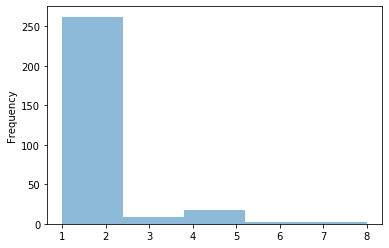

In [25]:
df_submit.plot.hist(bins=5, alpha=0.5)

In [26]:
device = df.groupby(["DEVICE"])["DEVICE"].count()
device = device.sort_values(ascending = False).head(20)
device

DEVICE
iPhone XR         118
iPhone 8 Plus      67
iPhone X           59
iPhone 7 Plus      44
iPhone XS Max      40
iPhone 7           38
iPhone12,1         30
SM-N975U           23
SM-G960U           23
iPhone 8           21
SM-J337V           20
iPhone 6s          20
iPhone XS          18
SM-N950U           18
iPhone12,5         18
SM-G975U           18
iPhone 6           17
SM-J737T           15
iPhone 6s Plus     15
SM-G965U           14
Name: DEVICE, dtype: int64

In [27]:
logins = df[ (df["RESPONSE_STATUS_ID"] == 300200) | (df["RESPONSE_STATUS_ID"] == 300100) ]
logins.shape

(581, 9)

In [28]:
logins.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-30 00:10:13,300100,iPhone XR,12.3.1,NaN,0,0,2019-10-30 00:10:13,1.0.201910230000.2
1,2019-10-30 00:14:26,300100,SM-G965U,28,NaN,0,0,2019-10-30 00:14:32,1.0
2,2019-10-30 00:42:37,300200,iPhone XS Max,13.1.3,NaN,0,0,2019-10-30 00:42:51,1.0.201910230000.2
3,2019-10-30 00:51:40,300100,iPhone 7,13.1.3,NaN,0,0,2019-10-30 00:51:44,1.0.201910230000.2
4,2019-10-30 01:05:18,300100,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:05:22,1.0.201910230000.2
6,2019-10-30 01:14:16,300100,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:14:16,1.0.201910230000.2
7,2019-10-30 01:47:51,300100,iPhone 8 Plus,13.1.3,NaN,0,0,2019-10-30 01:47:53,1.0.201910230000.2
9,2019-10-30 02:36:56,300200,REVVLPLUS C3701A,25,NaN,0,0,2019-10-30 02:36:59,1.0
10,2019-10-30 02:38:38,300100,REVVLPLUS C3701A,25,NaN,0,0,2019-10-30 02:38:41,1.0
12,2019-10-30 03:17:41,300100,SM-N950U,28,NaN,0,0,2019-10-30 03:17:43,1.0


In [29]:
df[ (df["DEVICE"] == "iPhone 5s") ]

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION


In [30]:
iP8 = logins[ (logins["DEVICE"]=="iPhone 8 Plus") & (logins["RESPONSE_STATUS_ID"] == 300100) ]

In [31]:
iP8["Time_Lag"] = iP8["INSERT_TS"] - iP8["INSERT_TS"].shift(1) 

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
iP8["Time_Lag"].dt.total_seconds()

7          NaN
32     20625.0
123     9829.0
183     2281.0
188      476.0
192       72.0
249     1852.0
323     2701.0
353     1063.0
354       34.0
365      233.0
377      525.0
385      398.0
476     3563.0
488      262.0
505      445.0
510      138.0
589     3321.0
608      688.0
610      127.0
729     4112.0
755      731.0
807     1953.0
818      236.0
826      256.0
836      235.0
Name: Time_Lag, dtype: float64

In [33]:
iP8["Time_Lag"]

7          NaT
32    05:43:45
123   02:43:49
183   00:38:01
188   00:07:56
192   00:01:12
249   00:30:52
323   00:45:01
353   00:17:43
354   00:00:34
365   00:03:53
377   00:08:45
385   00:06:38
476   00:59:23
488   00:04:22
505   00:07:25
510   00:02:18
589   00:55:21
608   00:11:28
610   00:02:07
729   01:08:32
755   00:12:11
807   00:32:33
818   00:03:56
826   00:04:16
836   00:03:55
Name: Time_Lag, dtype: timedelta64[ns]

In [34]:
df.head(20)

,INSERT_TS,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
0,2019-10-30 00:10:13,300100,iPhone XR,12.3.1,NaN,0,0,2019-10-30 00:10:13,1.0.201910230000.2
1,2019-10-30 00:14:26,300100,SM-G965U,28,NaN,0,0,2019-10-30 00:14:32,1.0
2,2019-10-30 00:42:37,300200,iPhone XS Max,13.1.3,NaN,0,0,2019-10-30 00:42:51,1.0.201910230000.2
3,2019-10-30 00:51:40,300100,iPhone 7,13.1.3,NaN,0,0,2019-10-30 00:51:44,1.0.201910230000.2
4,2019-10-30 01:05:18,300100,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:05:22,1.0.201910230000.2
5,2019-10-30 01:10:44,400100,iPhone XR,13.1.3,686dacaa-dbf8-4576-9d0e-b7e513b838ee,5994640,8,2019-10-30 01:10:45,1.0.201910230000.2
6,2019-10-30 01:14:16,300100,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:14:16,1.0.201910230000.2
7,2019-10-30 01:47:51,300100,iPhone 8 Plus,13.1.3,NaN,0,0,2019-10-30 01:47:53,1.0.201910230000.2
8,2019-10-30 01:51:54,400100,iPhone 8 Plus,13.1.3,e7951869-9ac9-4182-9b1b-9c76a1a2b896,4546592,2,2019-10-30 01:51:56,1.0.201910230000.2
9,2019-10-30 02:36:56,300200,REVVLPLUS C3701A,25,NaN,0,0,2019-10-30 02:36:59,1.0


In [35]:
df_Copy = df.copy()

In [36]:
df["RESPONSE_STATUS_ID"] = df["RESPONSE_STATUS_ID"].replace( [300200,300100,300202,400205,400100,], [1,2,3,4,5])

In [37]:
df.groupby(["RESPONSE_STATUS_ID"])["RESPONSE_STATUS_ID"].count()

RESPONSE_STATUS_ID
1    219
2    362
5    292
Name: RESPONSE_STATUS_ID, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 9 columns):
INSERT_TS               873 non-null datetime64[ns]
RESPONSE_STATUS_ID      873 non-null int64
DEVICE                  873 non-null object
DEVICE_OS               873 non-null object
MOBILE_SUBMISSION_ID    292 non-null object
Size                    873 non-null int64
Page Count              873 non-null int64
LAST_UPDATE_TS          873 non-null datetime64[ns]
CLIENT_VERSION          873 non-null object
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 61.5+ KB


In [39]:
df.set_index("INSERT_TS", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 873 entries, 2019-10-30 00:10:13 to 2019-10-30 17:45:30
Data columns (total 8 columns):
RESPONSE_STATUS_ID      873 non-null int64
DEVICE                  873 non-null object
DEVICE_OS               873 non-null object
MOBILE_SUBMISSION_ID    292 non-null object
Size                    873 non-null int64
Page Count              873 non-null int64
LAST_UPDATE_TS          873 non-null datetime64[ns]
CLIENT_VERSION          873 non-null object
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 61.4+ KB


In [40]:
df.head(20)

,RESPONSE_STATUS_ID,DEVICE,DEVICE_OS,MOBILE_SUBMISSION_ID,Size,Page Count,LAST_UPDATE_TS,CLIENT_VERSION
INSERT_TS,,,,,,,,
2019-10-30 00:10:13,2,iPhone XR,12.3.1,NaN,0,0,2019-10-30 00:10:13,1.0.201910230000.2
2019-10-30 00:14:26,2,SM-G965U,28,NaN,0,0,2019-10-30 00:14:32,1.0
2019-10-30 00:42:37,1,iPhone XS Max,13.1.3,NaN,0,0,2019-10-30 00:42:51,1.0.201910230000.2
2019-10-30 00:51:40,2,iPhone 7,13.1.3,NaN,0,0,2019-10-30 00:51:44,1.0.201910230000.2
2019-10-30 01:05:18,2,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:05:22,1.0.201910230000.2
2019-10-30 01:10:44,5,iPhone XR,13.1.3,686dacaa-dbf8-4576-9d0e-b7e513b838ee,5994640,8,2019-10-30 01:10:45,1.0.201910230000.2
2019-10-30 01:14:16,2,iPhone XR,13.1.3,NaN,0,0,2019-10-30 01:14:16,1.0.201910230000.2
2019-10-30 01:47:51,2,iPhone 8 Plus,13.1.3,NaN,0,0,2019-10-30 01:47:53,1.0.201910230000.2
2019-10-30 01:51:54,5,iPhone 8 Plus,13.1.3,e7951869-9ac9-4182-9b1b-9c76a1a2b896,4546592,2,2019-10-30 01:51:56,1.0.201910230000.2


In [41]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})



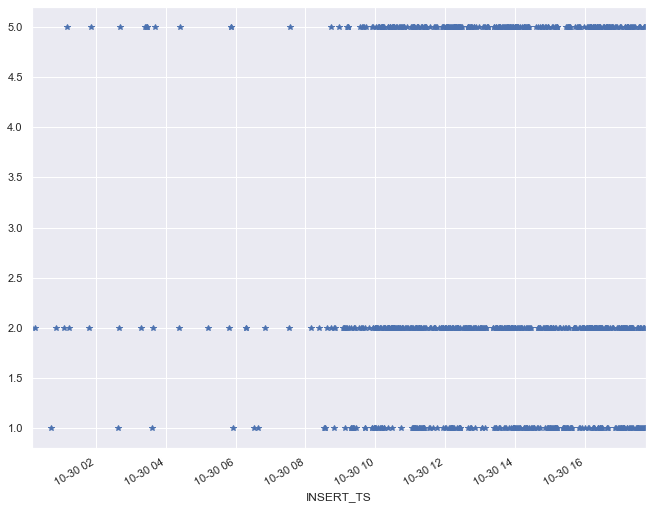

In [42]:
#df["RESPONSE_STATUS_ID"].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True))

df["RESPONSE_STATUS_ID"].plot(marker='*', linestyle='None',figsize=(11, 9))